# Categorizing Risk Factors Leading To Lung Cancer Using Clustering Model

## Overview 

My name is Fatima Abdullah (M00434618). This is my first Deep Leaning - Clustering model assignment and is part of the CST4050 Assignment Project. I will be using tools like Python and Kaggle for dataset to complete the project and also use my knowledge that I learnt. I will be using lung cancer dataset which is collected over an survey by the partipiants. The cancer prediction system's effectiveness allows individuals to understand their cancer risk at a low cost, enabling them to make informed decisions based on their risk status.  

Questions & following deliverables:

1. Highlight participants at high risk categories
2. Symptoms influcing lung cancer risks

## Step 1 : Reading and Understanding Data

In [92]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [93]:
filename = "/Users/fatimaabdullah93/Desktop/survey_lung_cancer.csv"
df = pd.read_csv(filename)


In [94]:
def bar_custom(current, total, width=100):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))


# Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f"/kaggle/input/lung-cancer-detection/survey lung cancer.csv{filename}"
    try:
        import os

        if filename not in os.listdir():
            !pip3 install wget
            import wget

            downloaded_filename = wget.download(url)
            print(f"{downloaded_filename} file downloaded", bar=bar_custom)
        else:
            print(f"{filename} already exists")
        return pd.read_csv(filename, **kwargs)

    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [95]:

df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [96]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [97]:
# df description
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Key Insights from the Numerical Attributes Statistics

Age:

Minimum value: 21
Maximum value: 87
Mean: 62.67
Median: 62
Standard deviation: 8.21

The age distribution leans towards older individuals, despite the presence of younger people (21 years old) in the data. The skewness of the distribution is uncertain; it might be significantly left-skewed with a long tail. If this is the case, the standard deviation might be less meaningful.
Other Numerical Attributes ('Smoking' to 'Chest Pain'):

Minimum value: 1
Maximum value: 2

* If perfectly balanced, each feature would have a mean of 1.5.
* Features with means above 1.5 indicate more data points with a value of 2.
* Features with means below 1.5 indicate more data points with a value of 1.
* This suggests the initial data set might be unbalanced and could benefit from more careful sampling, a task to be addressed in subsequent steps.

In [98]:
# Let's check the shape of the data set
df.shape


(309, 16)

### Observation:

The data is pretty interesting as it has various parameters that can help in getting the best out prediction and analysis model out of this dataset




## Step 2 : Data Cleansing

In [99]:
# Calculating the Missing Values % contribution in df
df_null = round(100 * (df.isnull().sum()) / len(df), 2)
df_null

GENDER                   0.0
AGE                      0.0
SMOKING                  0.0
YELLOW_FINGERS           0.0
ANXIETY                  0.0
PEER_PRESSURE            0.0
CHRONIC DISEASE          0.0
FATIGUE                  0.0
ALLERGY                  0.0
WHEEZING                 0.0
ALCOHOL CONSUMING        0.0
COUGHING                 0.0
SHORTNESS OF BREATH      0.0
SWALLOWING DIFFICULTY    0.0
CHEST PAIN               0.0
LUNG_CANCER              0.0
dtype: float64

### Observation

There are NO missing values here

In [100]:
#Check for duplicate values

df.duplicated().sum()


33

In [101]:
#remove repeated rows
df.drop_duplicates(inplace=True)

#Check for duplicate values
df.duplicated().sum()

0

In [102]:
#count number of rows and columns in the dataset

df.shape

(276, 16)

In [103]:
#Create a new column for Gender in numerical

df['Gender_num'] = df['GENDER'].map({'F': 0, 'M': 1})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Gender_num
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0


In [104]:
#Create a new column for Lung Cancer in numerical

df['Lung_cancer_num'] = df['LUNG_CANCER'].map({'NO': 1, 'YES': 2})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Gender_num,Lung_cancer_num
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,1


## Step 3 : EDA - Data Preparation/PreProcessing

/var/folders/xn/663bz7bn6x90svlgcl1kc28r0000gn/T/ipykernel_9403/3362653514.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['GENDER', 'Gender_num'], axis=1).corr(), annot=True, cmap="Blues", fmt='.1f')


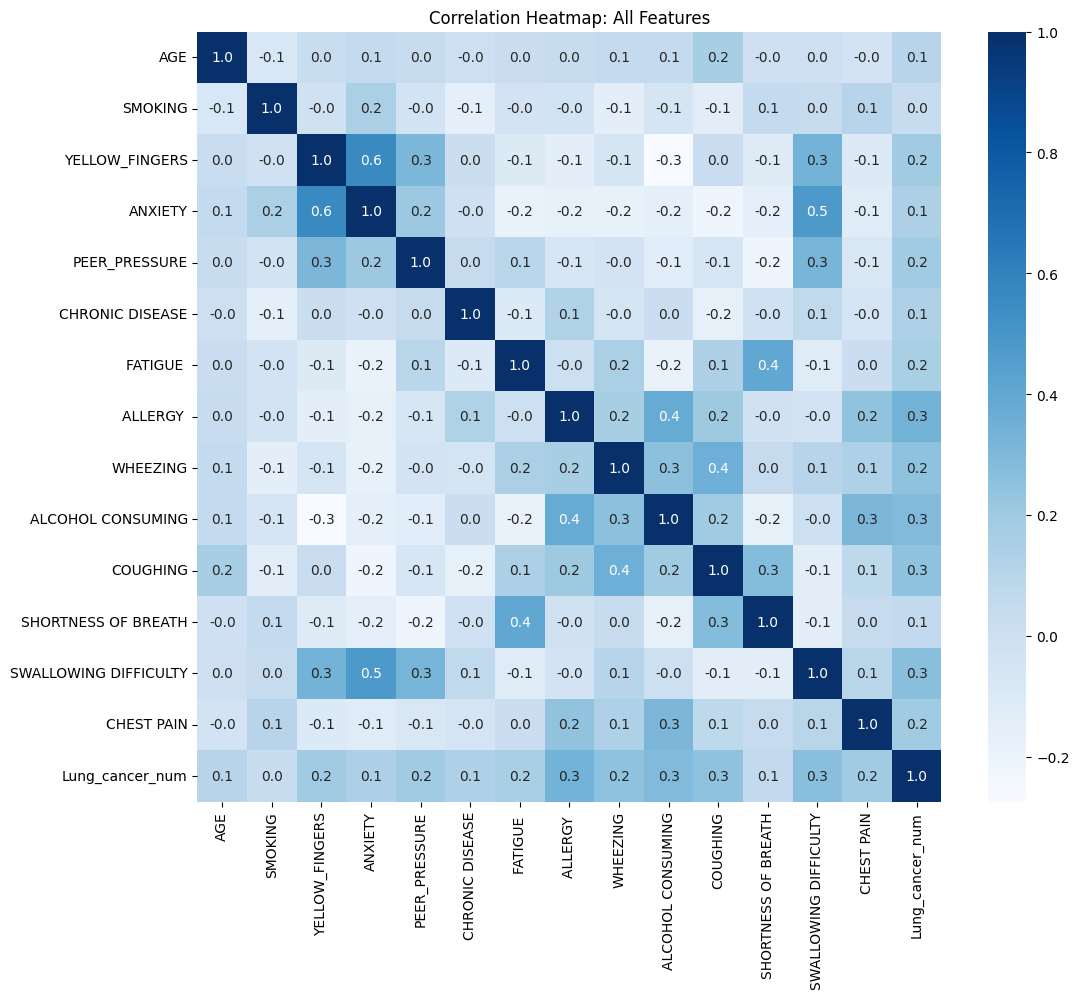

In [106]:
#Plot a heatmap to check the correlation between the features

plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['GENDER', 'Gender_num'], axis=1).corr(), annot=True, cmap="Blues", fmt='.1f')
plt.title("Correlation Heatmap: All Features")
plt.show()


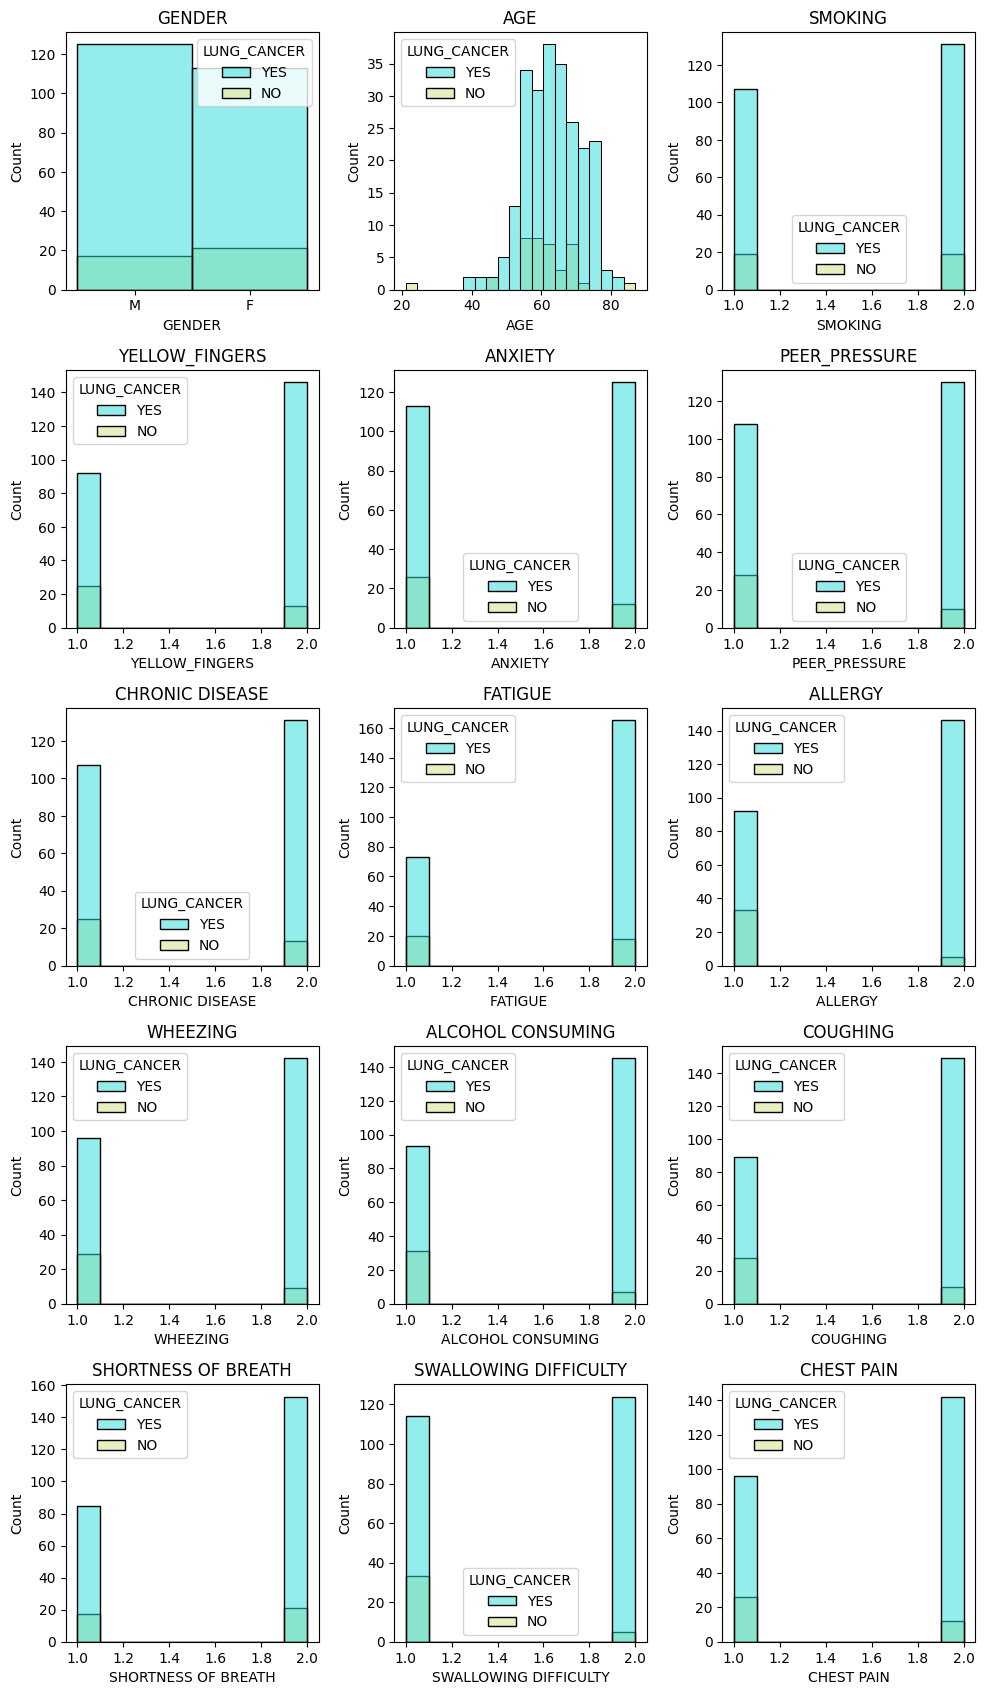

In [107]:
#Plot a heatmap to check the correlation between the features

num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
    'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'teal', 'lime', 'indigo']
for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER', palette='rainbow')
plt.tight_layout()
plt.show()


Here are some simple observations from the graphs provided:

1. **Gender**: 
   - Lung cancer is more prevalent in males compared to females.

2. **Age**: 
   - Lung cancer cases are more frequent in older age groups, particularly between 55 and 80 years.

3. **Smoking**: 
   - A significant number of lung cancer patients have a history of smoking.

4. **Yellow Fingers**: 
   - Most lung cancer patients exhibit the symptom of yellow fingers.

5. **Anxiety**: 
   - Anxiety is more common among lung cancer patients.

6. **Peer Pressure**: 
   - Lung cancer patients often report being influenced by peer pressure.

7. **Chronic Disease**: 
   - There is a high incidence of chronic disease among lung cancer patients.

8. **Fatigue**: 
   - Fatigue is a common symptom in lung cancer patients.

9. **Allergy**: 
   - Allergies are not significantly different between lung cancer patients and non-patients.

10. **Wheezing**: 
    - Wheezing is more frequently reported by lung cancer patients.

11. **Alcohol Consumption**: 
    - Lung cancer patients tend to consume alcohol, though the difference is not very pronounced.

12. **Coughing**: 
    - Coughing is a common symptom among lung cancer patients.

13. **Shortness of Breath**: 
    - Lung cancer patients often experience shortness of breath.

14. **Swallowing Difficulty**: 
    - Difficulty in swallowing is reported by many lung cancer patients.

15. **Chest Pain**: 
    - Chest pain is a prevalent symptom in lung cancer patients.

These observations suggest that certain factors and symptoms are more common in individuals with lung cancer, potentially aiding in early diagnosis and awareness.

In [108]:
df.corr()

/var/folders/xn/663bz7bn6x90svlgcl1kc28r0000gn/T/ipykernel_9403/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Gender_num,Lung_cancer_num
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,-0.013120,0.106305
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.041131,0.034878
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,-0.202506,0.189192
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,-0.152032,0.144322
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,-0.261427,0.195086
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,-0.189925,0.143692
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,-0.079020,0.160078
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.150174,0.333552
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.121047,0.249054
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767,0.434264,0.294422


<a id="4"></a> <br>
## Step 4 : Building the Model

### Finding the Optimal Number of Clusters

#### Elbow Curve to get the correct number of Clusters
A fundamental step for any unsupervised algorithm is determining the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to decide this optimal value of k.

In [119]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_list = []

# Calculate the inertia for each value of k
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_encoded)
    inertia_list.append(kmeans.inertia_)

# Plot the graph
plt.plot(range_n_clusters, inertia_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()


ValueError: could not convert string to float: 'M'

In [120]:
kmeans_model = KMeans(n_clusters=5)
df['Cluster'] = kmeans_model.fit_predict(df_encoded)

ValueError: could not convert string to float: 'M'

Based on the elbow it is suggested to use 5 clusters

### K-Means Clustering

## Find mean, Median & Stand Deviation of each clusters

In [ ]:

cluster_stats = df.groupby('Cluster').agg({'AGE': ['mean', 'median', 'std'],
                                                                   'SMOKING': ['mean', 'median', 'std'],
                                                                   'YELLOW_FINGERS': ['mean', 'median', 'std'],
                                                                   'ANXIETY': ['mean', 'median', 'std'],
                                                                   'PEER_PRESSURE': ['mean', 'median', 'std'],
                                                                   'CHRONIC DISEASE': ['mean', 'median', 'std'],
                                                                   'WHEEZING': ['mean', 'median', 'std'],
                                                                   'ALCOHOL CONSUMING': ['mean', 'median', 'std'],
                                                                   'COUGHING': ['mean', 'median', 'std'],
                                                                   'SHORTNESS OF BREATH': ['mean', 'median', 'std'],
                                                                   'SWALLOWING DIFFICULTY': ['mean', 'median', 'std'],
                                                                   'CHEST PAIN': ['mean', 'median', 'std']})
cluster_stats.columns = ['AGE_mean', 'AGE_median', 'AGE_std',
                                                  'SMOKING_mean', 'SMOKING_median', 'SMOKING_std',
                                                  'YELLOW_FINGERS_mean', 'YELLOW_FINGERS_median', 'YELLOW_FINGERS_std',
                                                  'ANXIETY_mean', 'ANXIETY_median', 'ANXIETY_std',
                                                  'PEER_PRESSURE_mean', 'PEER_PRESSURE_median', 'PEER_PRESSURE_std',
                                                  'CHRONIC_DISEASE_mean', 'CHRONIC_DISEASE_median', 'CHRONIC_DISEASE_std',
                                                  'WHEEZING_mean', 'WHEEZING_median', 'WHEEZING_std',
                                                  'ALCOHOL_CONSUMING_mean', 'ALCOHOL_CONSUMING_median', 'ALCOHOL_CONSUMING_std',
                                                  'COUGHING_mean', 'COUGHING_median', 'COUGHING_std',
                                                  'SHORTNESS_OF_BREATH_mean', 'SHORTNESS_OF_BREATH_median', 'SHORTNESS_OF_BREATH_std',
                                                  'SWALLOWING_DIFFICULTY_mean', 'SWALLOWING_DIFFICULTY_median', 'SWALLOWING_DIFFICULTY_std',
                                                  'CHEST_PAIN_mean', 'CHEST_PAIN_median', 'CHEST_PAIN_std']
cluster_stats


,AGE_mean,AGE_median,AGE_std,SMOKING_mean,SMOKING_median,SMOKING_std,YELLOW_FINGERS_mean,YELLOW_FINGERS_median,YELLOW_FINGERS_std,ANXIETY_mean,...,COUGHING_std,SHORTNESS_OF_BREATH_mean,SHORTNESS_OF_BREATH_median,SHORTNESS_OF_BREATH_std,SWALLOWING_DIFFICULTY_mean,SWALLOWING_DIFFICULTY_median,SWALLOWING_DIFFICULTY_std,CHEST_PAIN_mean,CHEST_PAIN_median,CHEST_PAIN_std
Cluster,,,,,,,,,,,,,,,,,,,,,
0,69.283582,69.0,1.840668,1.537313,2.0,0.502369,1.537313,2.0,0.502369,1.522388,...,0.454138,1.671642,2.0,0.473160,1.373134,1.0,0.487288,1.522388,2.0,0.503268
1,61.747475,62.0,1.859029,1.525253,2.0,0.501903,1.616162,2.0,0.488794,1.565657,...,0.501903,1.595960,2.0,0.493203,1.525253,2.0,0.501903,1.555556,2.0,0.499433
2,44.000000,47.0,7.483315,1.500000,1.5,0.518875,1.642857,2.0,0.497245,1.285714,...,0.518875,1.785714,2.0,0.425815,1.500000,1.5,0.518875,1.571429,2.0,0.513553
3,76.242424,76.0,2.850771,1.484848,1.0,0.507519,1.636364,2.0,0.488504,1.454545,...,0.488504,1.636364,2.0,0.488504,1.545455,2.0,0.505650,1.545455,2.0,0.505650
4,55.174603,56.0,2.052062,1.619048,2.0,0.489522,1.507937,2.0,0.503953,1.428571,...,0.503953,1.603175,2.0,0.493169,1.428571,1.0,0.498847,1.603175,2.0,0.493169


### K Means Clustering

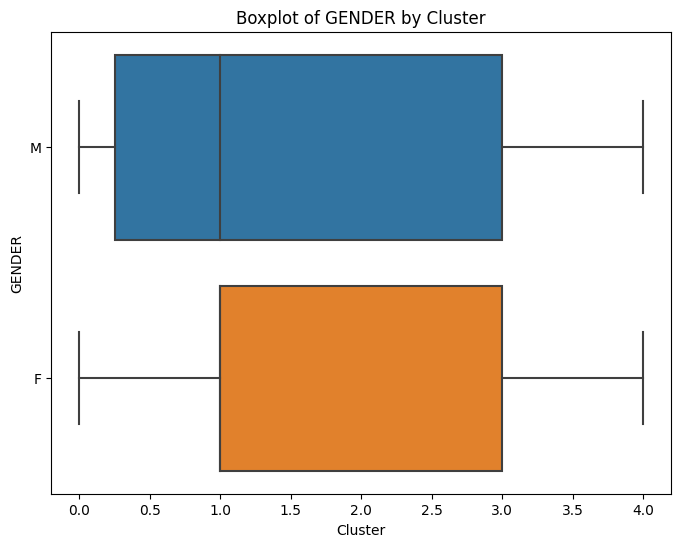

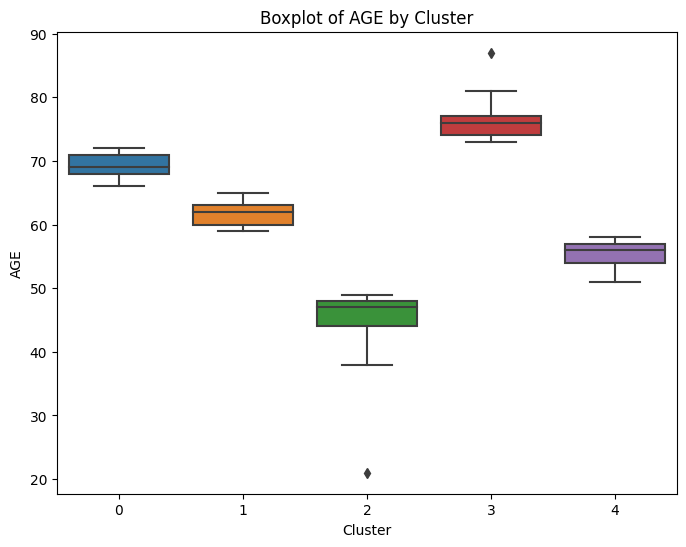

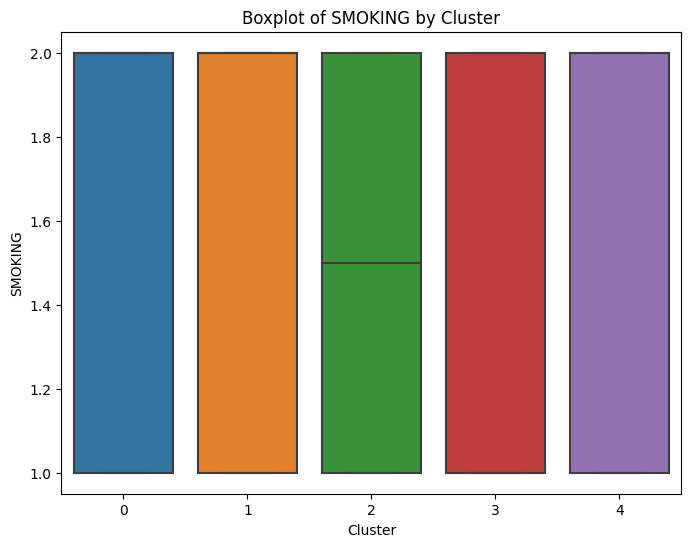

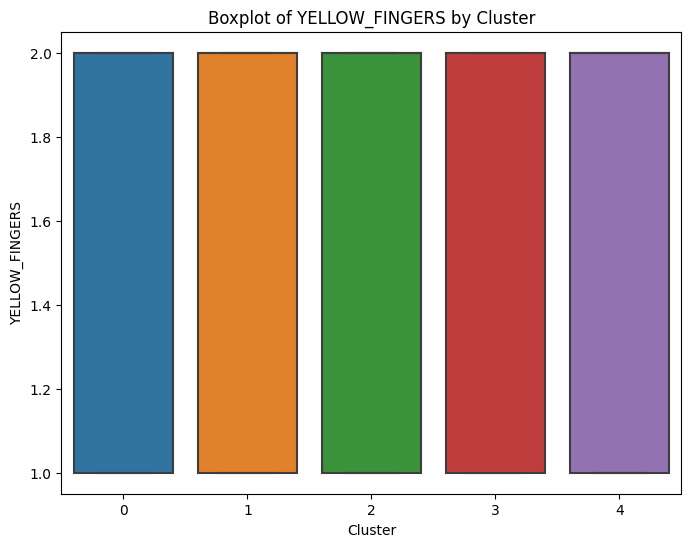

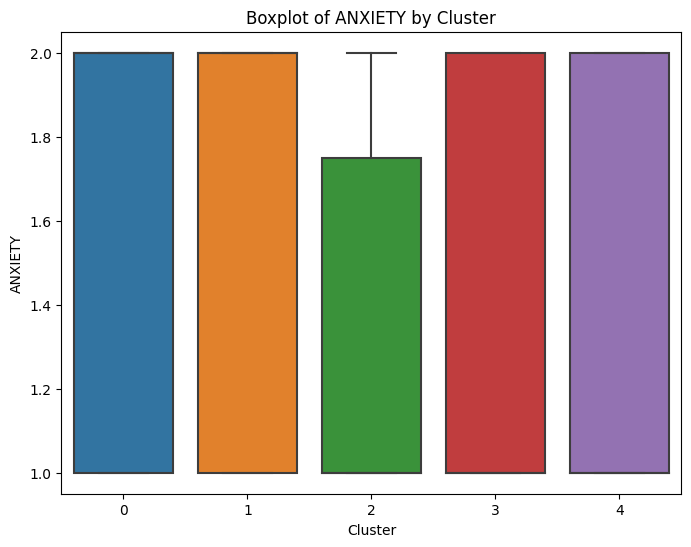

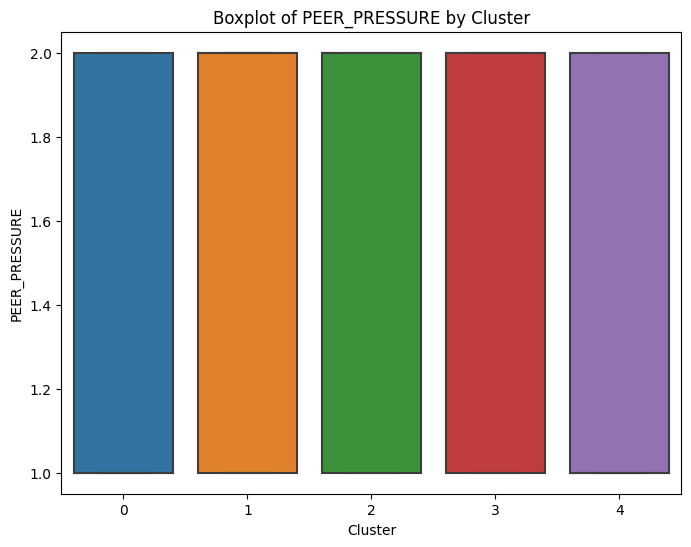

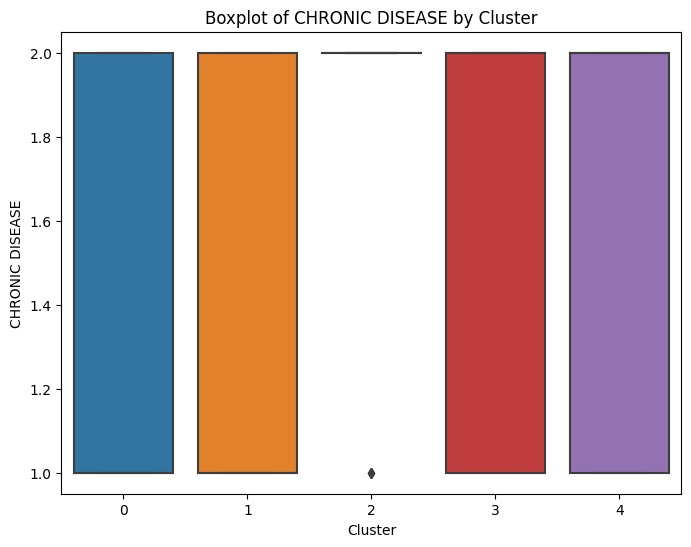

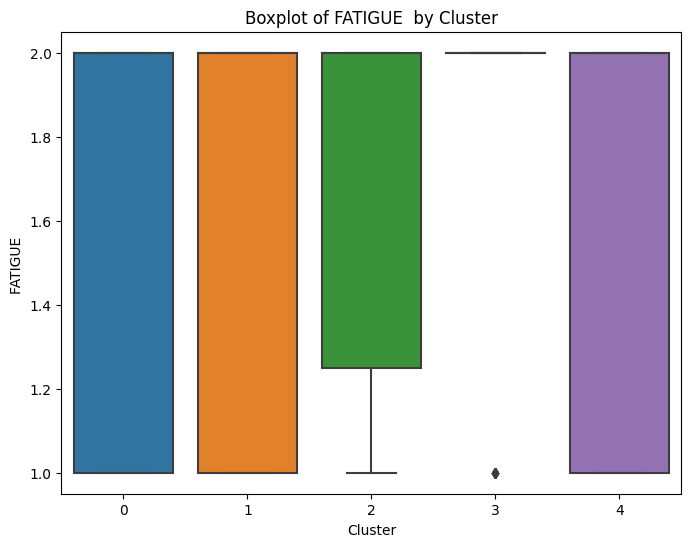

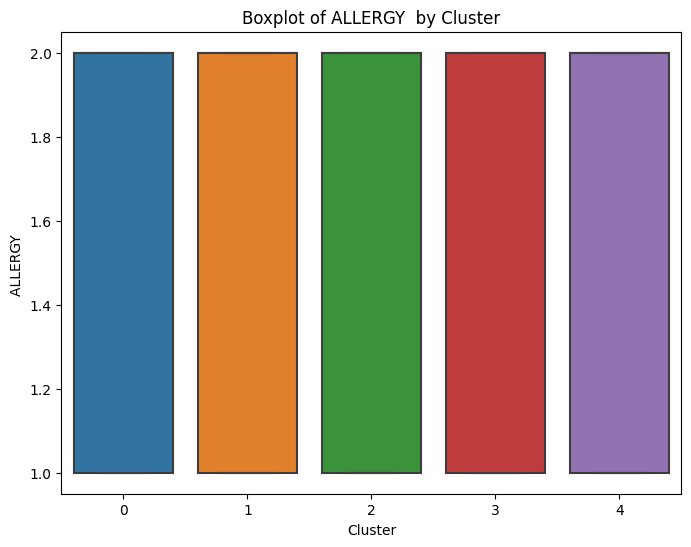

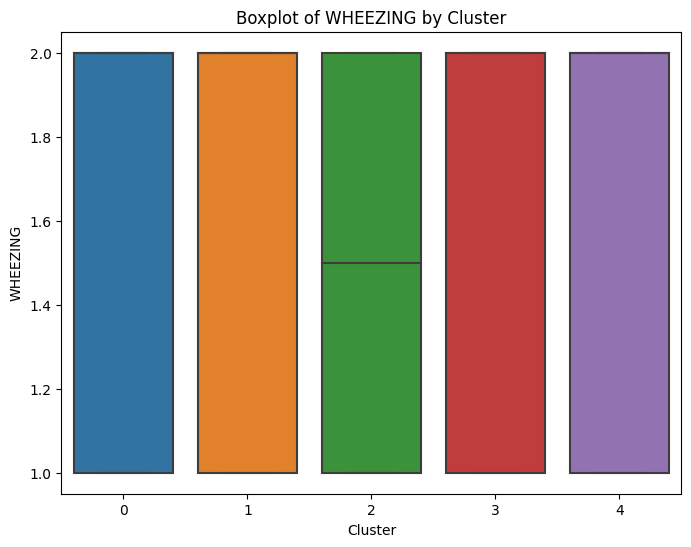

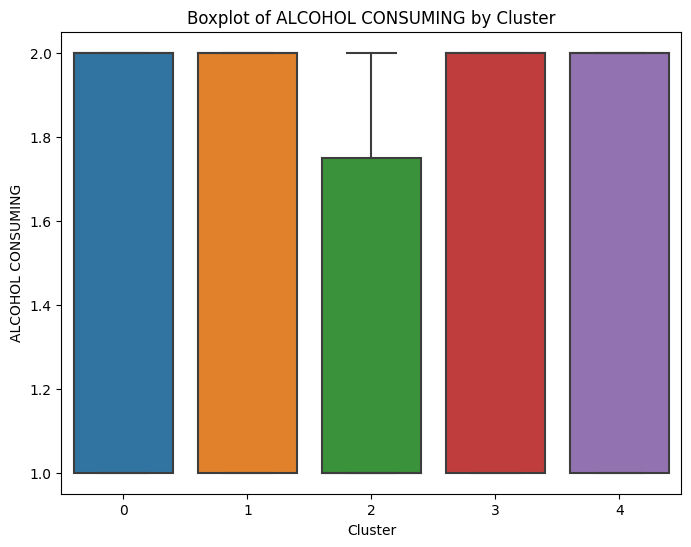

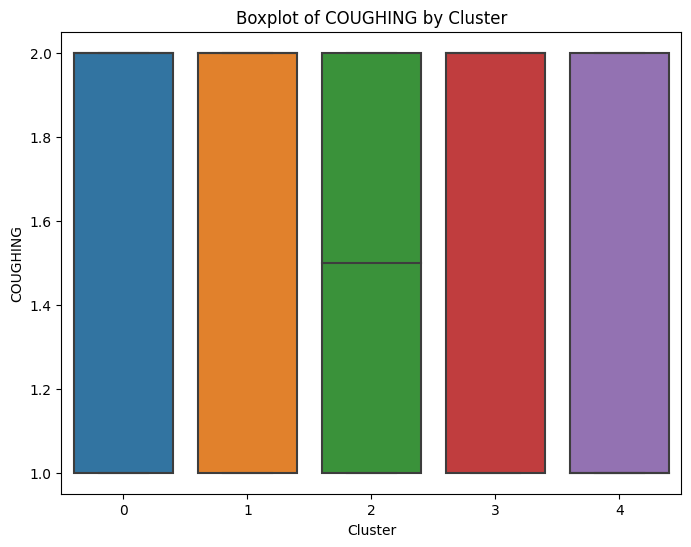

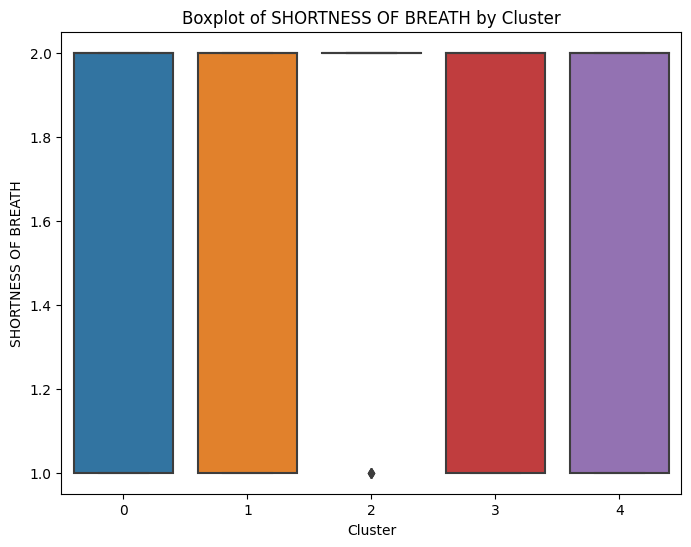

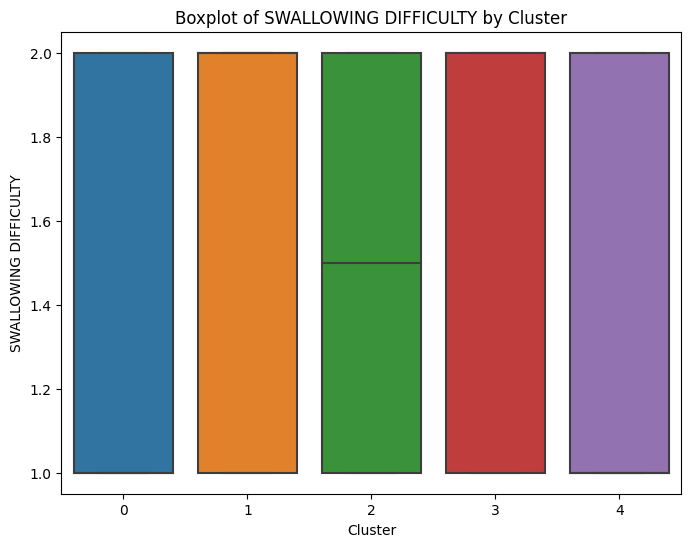

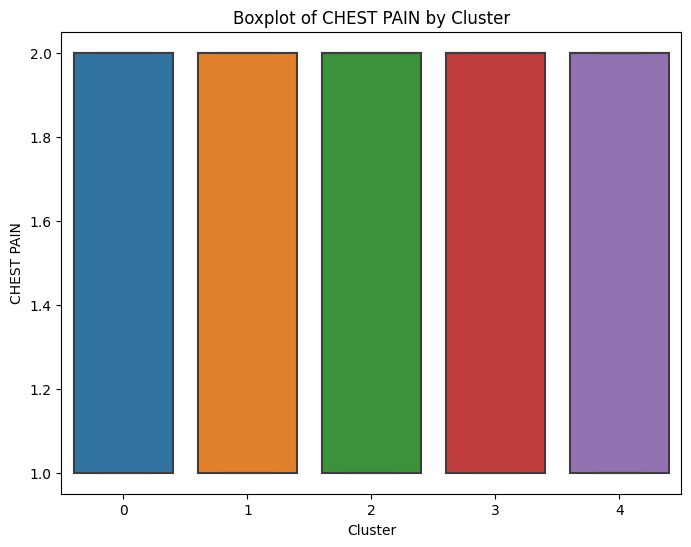

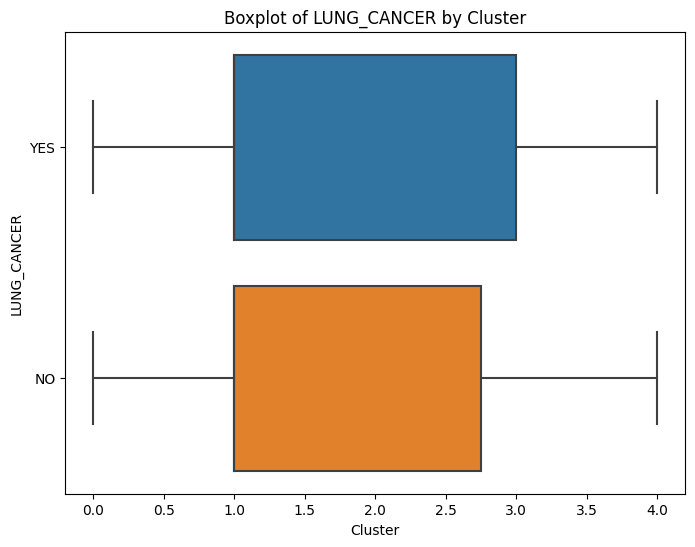

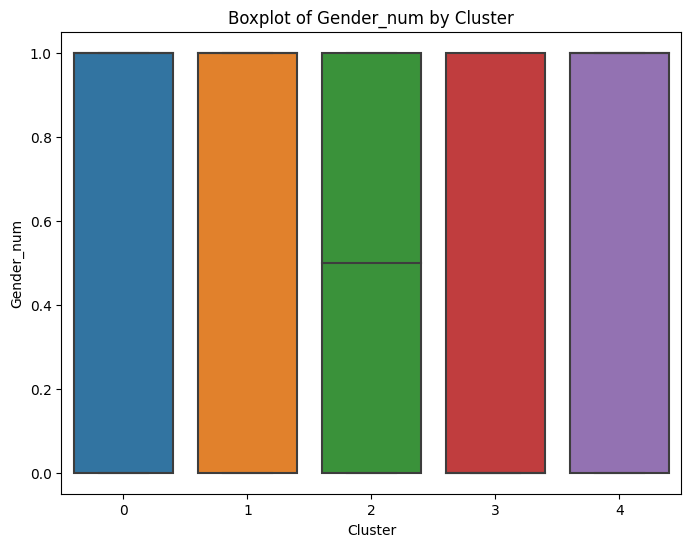

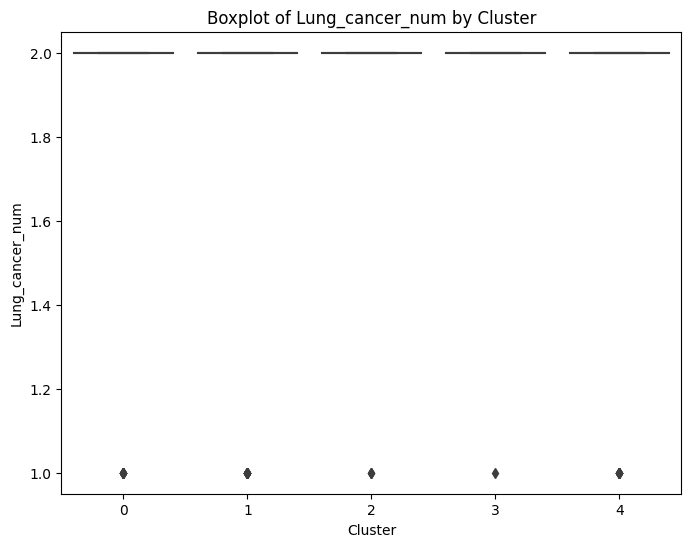

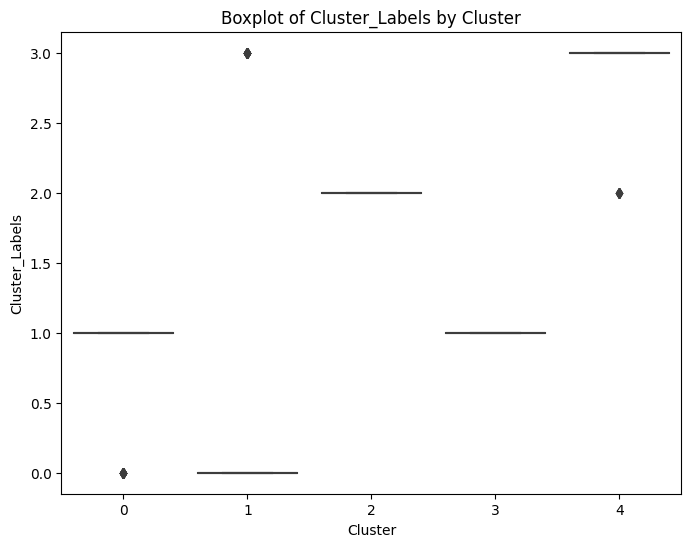

In [ ]:


# Create a boxplot for each variable
for column in df.columns:
    if column != 'Cluster':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Cluster', y=column, data=df)
        plt.title(f'Boxplot of {column} by Cluster')
        plt.show()

## Step 5 : Final Analysis

In [ ]:


# Define a function to describe each cluster
def describe_clusters(cluster_stats):
    cluster_descriptions = {}
    
    for cluster in cluster_stats.index:
        description = []
        
        for feature in cluster_stats.columns.get_level_values(0).unique():
            mean = cluster_stats.loc[cluster, (feature, 'mean')]
            median = cluster_stats.loc[cluster, (feature, 'median')]
            std = cluster_stats.loc[cluster, (feature, 'std')]
            
            description.append(f"{feature}: mean={mean:.2f}, median={median:.2f}, std={std:.2f}")
        
        cluster_descriptions[cluster] = description
    
    return cluster_descriptions

# Display the statistics for a quick overview
print(cluster_stats)

# Define a function to describe each cluster
def describe_clusters(cluster_stats):
    cluster_descriptions = {}
    
    for cluster in cluster_stats.index:
        description = []
        
        for feature in cluster_stats.columns.get_level_values(0).unique():
            mean = cluster_stats.loc[cluster, (feature, 'mean')]
            median = cluster_stats.loc[cluster, (feature, 'median')]
            std = cluster_stats.loc[cluster, (feature, 'std')]
            
            description.append(f"{feature}: mean={mean:.2f}, median={median:.2f}, std={std:.2f}")
        
        cluster_descriptions[cluster] = description
    
    return cluster_descriptions

# Assume cluster_stats is already defined and contains the aggregated statistics


# Get the descriptions

cluster_descriptions = describe_clusters(cluster_stats)

# Print the descriptions
for cluster, description in cluster_descriptions.items():
    print(f"Cluster {cluster}:")
    for feature_desc in description:
        print(f"  {feature_desc}")
    print("\n")

# Find key features that differentiate clusters
def find_key_features(cluster_stats):
    key_features = {}
    
    for feature in cluster_stats.columns.levels[0]:
        feature_stats = cluster_stats[feature]
        
        mean_range = feature_stats['mean'].max() - feature_stats['mean'].min()
        median_range = feature_stats['median'].max() - feature_stats['median'].min()
        std_range = feature_stats['std'].max() - feature_stats['std'].min()
        
        if mean_range > threshold_mean or median_range > threshold_median or std_range > threshold_std:
            key_features[feature] = {
                'mean_range': mean_range,
                'median_range': median_range,
                'std_range': std_range
            }
    
    return key_features

# Define thresholds for identifying key features
threshold_mean = 5  # Adjust as needed based on your data
threshold_median = 5  # Adjust as needed based on your data
threshold_std = 2  # Adjust as needed based on your data

# Get key features
key_features = find_key_features(cluster_stats)

# Print key features
print("Key Features that differentiate clusters:")
for feature, ranges in key_features.items():
    print(f"{feature}: mean_range={ranges['mean_range']:.2f}, median_range={ranges['median_range']:.2f}, std_range={ranges['std_range']:.2f}")

      


          AGE_mean  AGE_median   AGE_std  SMOKING_mean  SMOKING_median  \
Cluster                                                                  
0        69.283582        69.0  1.840668      1.537313             2.0   
1        61.747475        62.0  1.859029      1.525253             2.0   
2        44.000000        47.0  7.483315      1.500000             1.5   
3        76.242424        76.0  2.850771      1.484848             1.0   
4        55.174603        56.0  2.052062      1.619048             2.0   

         SMOKING_std  YELLOW_FINGERS_mean  YELLOW_FINGERS_median  \
Cluster                                                            
0           0.502369             1.537313                    2.0   
1           0.501903             1.616162                    2.0   
2           0.518875             1.642857                    2.0   
3           0.507519             1.636364                    2.0   
4           0.489522             1.507937                    2.0   

    

AssertionError: 

We can find features of each clusters

Cluster 0 : 

Cluster 1 : 

Cluster 2 : 

Cluster 3 : 

Cluster 4 : 